# Geospatial and Text Data Analysis in Python - Zomato Case Study

__Build models for segmenting the neighborhoods to find the most conducive locations for starting a cafe business in Toronto City.__

Personal Data Analytics Project <br>
Author: [Diardano Raihan](https://www.linkedin.com/in/diardanoraihan)
<hr>

## Table of Content
* [Introduction: Business Problem](#Introduction)
* [Data](#Data)
* [Methodology: Analytic Approach](#methodology)
* [Mehtodology: Exploratory Data Analysis](#analysis)
* [Mehtodology: Cluster the Neighborhoods](#cluster)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction
<hr>

## Background

Zomato (Indian foodtech unicorn) is a multinational restaurant aggregator and online food delivery company available in 20+ countries. According to [Firstpost](https://www.firstpost.com/india/swiggy-clocks-over-9000-orders-zomato-crosses-7000-orders-per-minute-on-new-years-eve-10250391.html), on 31 December 2021, Zomato have touched a high of 7.100 orders per minute (~ 118 orders per second). Therefore, just imagine how large the amount of data have been generated by its customers.

## Business Problem
Now, we will try to analyze and squeeze possibly every insight of the data so that it will be worthwhile for our decision-making in the future. What makes this project interesting is that the type of data we have collected is . . . . . ; Then, what type of analysis we can perform on this Zomato data? 
- Graphical Analysis - what are those outlets and where exactly are those outlets present in your region?
- What are the most famous dishes of a particular restaurant? 
- What are most popular cuisines in your region? 
- What is the relationship between rating vs price for Zomato's restaurant (online order available) and non-restaurant (online order not available)?
- What is the highest-rated restaurant in your region?

## Target Audience
__Entrepreneurs__ who are passionate about opening a restaurant in a city would be very interested in this project. The project is also for __business owners__ and __stakeholders__ who want to expand their businesses by collaborating with any foodtech and wonder how data science could be applied to the questions at hand.

# Data
<hr>
    
## Data Requirement and Collection

Data Source: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants

## Data Preprocessing for Analysis

### Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

### Read the Data
- Read the first 5 rows of the dataset

In [3]:
df = pd.read_csv('Data/zomato.csv')
print(df.shape)
df.head()

(51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


- Check the number of data along with its corresponding data type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

- Check the shape of the Data

In [5]:
df.shape

(51717, 17)

### Missing Values Observation

- Check the number of missing values

In [6]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
# define a blank dictionary
nan_pct = {}
# obtain the number of rows of our dataset
rows = df.shape[0]
for col in df.columns:
    # sum the number of missing values
    nan = df[col].isnull().sum()
    # calculate the percentage of missing values
    pct = 100*nan/rows
    if pct != 0:
        # update the dictionary for any missing value exists
        nan_pct[col] = pct
        
# Sort the dictionary by its value in ascending order
nan_pct = dict(sorted(nan_pct.items(), key = lambda x: x[1], reverse=True))

# print the result
for item in nan_pct.items():
    print("Field '{}' has {}% missing values.".format(item[0], np.round(item[1],1)))

Field 'dish_liked' has 54.3% missing values.
Field 'rate' has 15.0% missing values.
Field 'phone' has 2.3% missing values.
Field 'approx_cost(for two people)' has 0.7% missing values.
Field 'rest_type' has 0.4% missing values.
Field 'cuisines' has 0.1% missing values.
Field 'location' has 0.0% missing values.


From here, we can see that our data has 7 features that contain missing values with the feature `dish_liked` has the most with more than 50%, followed by `rate` and `phone` as the Top 3.

### Missing Values Treatment

Depending on the problems at hand, you might want or not want to handle all the missing values from all the related fields. For this project, we try to manage it one step at a time. 

Say we deal with `rate` field first since we want to know what is the highest rated restaurant in the region.

In [8]:
df.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

As you can see that the values are kind of messy and notice that we have `NaN` also representing the missing value. Since it will not make sense to replace the corresponding values with any number (i.e. mean), we will drop the data containing such values. For `NEW` and `-` we will replace it with 0.

We can also modify the values in `rate` field so that it does not have `/5` for each rate value.

In [9]:
# Drop the row containing missing values in rate field
df.dropna(axis = 0, subset = ['rate'], inplace = True)
# Replace the non numerical values with 0 if such representation is acceptable
df.rate.replace( to_replace=['NEW', '-'], value = '0', inplace = True)
# Drop the '/5' if any and convert the data type to float
df.rate = df.rate.apply(lambda x: float(x.split('/')[0]))
print(df.shape)
df.head()

(43942, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


Moreover, we can deal with other features that have missing values the same way depending on what type of data that we are missing.

# Methodology
<hr>

## Analytic Approach

We approach the problem using the clustering technique, namely __k-Means__. This approach enables the audience to see how similar neighborhoods about their demographics. We can then examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

Moreover, we will also perform any statistics needed to answer questions concerning crime incidents, vehicle and foot traffic records.

__k-Means__ is one of the common machine learning algorithms used to cluster data points based on similar characteristics. The algorithm is fast and efficient for a medium and large-sized database and is useful to discover insights from unlabeled data quickly.

## Exploratory Data Analysis
__Definition__: In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)

### Avg Rating of Each Restaurant

In [16]:
df_rate = df[['name', 'rate']].groupby(by='name').mean().sort_values(by='rate', ascending=False).reset_index()
df_rate.rename(columns = {'name':'restaurant', 'rate':'avg_rating'}, inplace = True)
df_rate.head()

,restaurant,avg_rating
0,Asia Kitchen By Mainland China,4.900000
1,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
2,Byg Brewski Brewing Company,4.900000
3,Punjab Grill,4.871429
4,Belgian Waffle Factory,4.844828


### Distribution of Rating Column

C:\Users\Diardano Raihan\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


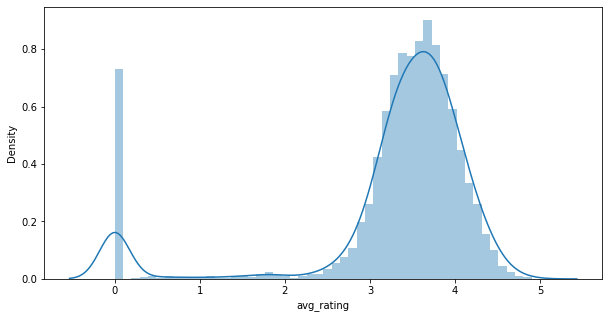

In [33]:
plt.figure(figsize = (10,5))
sns.distplot(df_rate.avg_rating)
plt.show()

From the graph, we observe that we have some of very high rated restaurant (>= 4.5) and the majority of the restaurants has a rating between 2-4.

### Top 20 Restaurant Chains in a Region

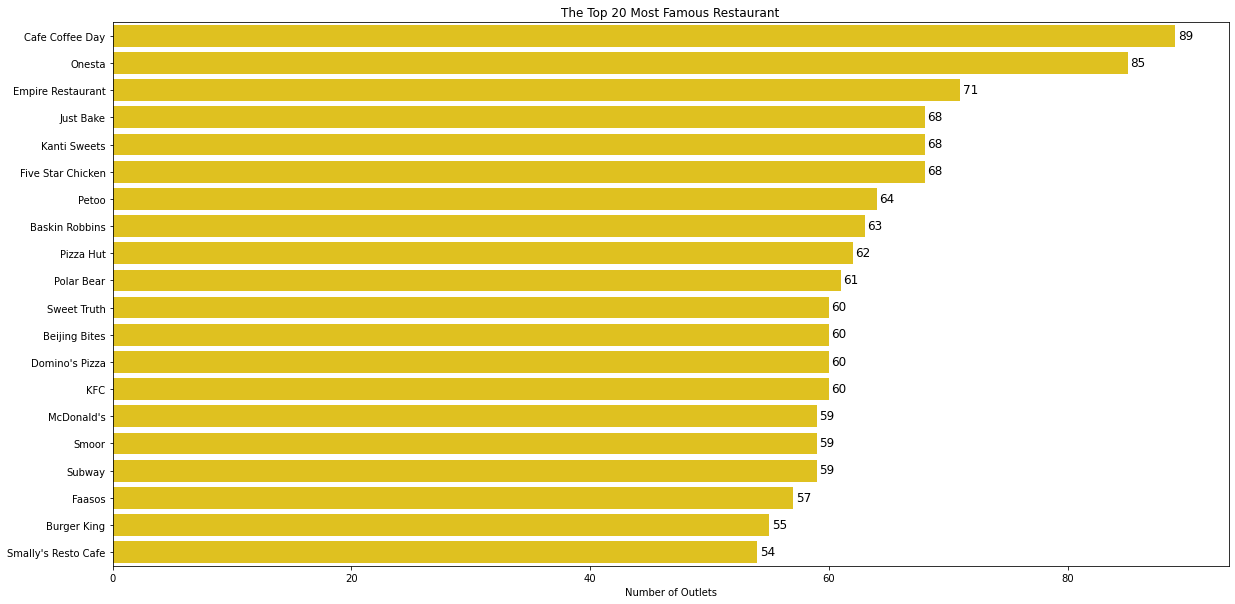

In [112]:
plt.figure(figsize = (20,10))
chains = df.name.value_counts()[:20]
ax = sns.barplot( x=chains, y = chains.index, color='gold')
for index, value in enumerate(chains):
    plt.text(x=value+0.2, y = index+0.1, s = str(value), fontsize = 12)
# ax.axes.xaxis.set_visible(False)
plt.title('The Top 20 Most Famous Restaurant')
plt.xlabel('Number of Outlets')
plt.show()

### Restaurants that Accept Online Orders

In [119]:
x = df.online_order.value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

Now, instead of using `matplotlib` or `seaborn`, we will use `plotly` which is another amazing library intended for production so that whenever you want to create a dashboard or stories, you can use `plotly`.

In [117]:
# !pip install plotly
import plotly.express as px

In [144]:
labels = ['Accepted', 'Not accepted']
px.pie(df, values = x, labels=labels, title = 'Restaurants that Support Online Orders')

As you can see now that we have much more interactive graph compared to matplotlib and seaborn. From the graph, we can see that more than 60% of the total Restaurants have supported online orders to serve their customers.

### Ratio between Restaurants that Provide Table vs Do Not

In [145]:
x = df.book_table.value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [134]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [148]:
labels = ['Not Book', 'Book']
trace = go.Pie( labels=labels, values = x, hoverinfo = 'label+percent', textinfo='value')
iplot([trace])

From this chart, we can see that only around 15% of the total restaurants accept table booking service.

### In-Depth Analysis of Types of Restaurants

In [162]:
print('Field `rest_type` contains {} ({}%) missing values'.format(df.rest_type.isna().sum(), np.round(nan_pct['rest_type'], 1)))

Field `rest_type` contains 151 (0.4%) missing values


We can just drop these missing values since currently we do not have sufficient information for the corresponding restaurants.

In [181]:
# drop any missing value
df.dropna(axis =0, subset=['rest_type'], inplace = True)
# Check for any missing value exist
df['rest_type'].isna().sum()

0

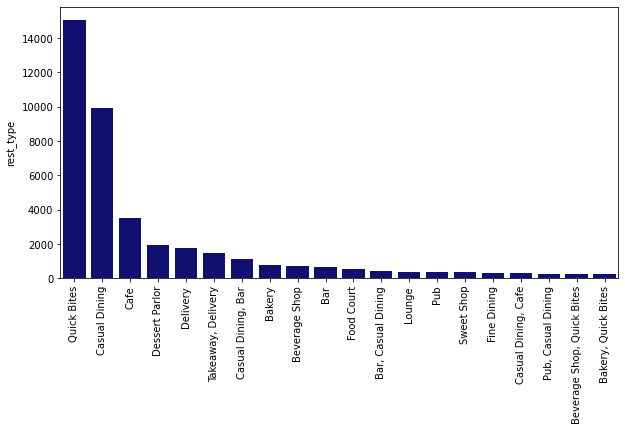

In [211]:
plt.figure(figsize = (10,5))
sns.barplot(x = df.rest_type.value_counts().nlargest(20).index, 
            y = df.rest_type.value_counts().nlargest(20), 
            color = 'navy')
plt.xticks(rotation=90)
plt.show()

In [199]:
trace2 = go.Bar(x = df.rest_type.value_counts().nlargest(20).index, 
                y = df.rest_type.value_counts().nlargest(20))
iplot([trace2])

The three types of restaurants (Quick Bites, Casual Dining, and Cafe) dominate all restaurants in Bengaluru.

### Highest Voted Restaurant

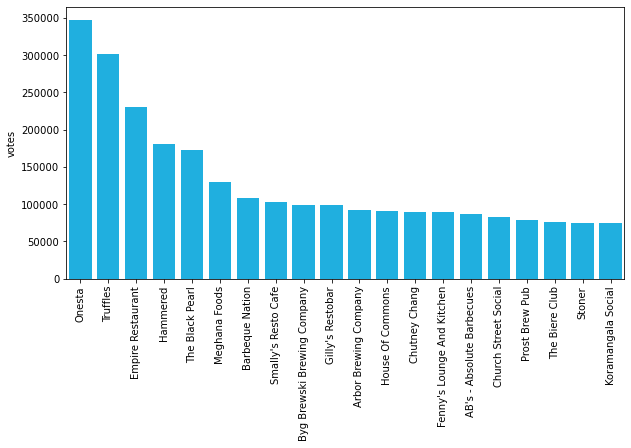

In [238]:
plt.figure(figsize = (10, 5))
sns.barplot(x = df.groupby('name')['votes'].sum().nlargest(20).index, 
            y = df.groupby('name')['votes'].sum().nlargest(20), 
            color = 'deepskyblue')
plt.xticks(rotation = 'vertical')
plt.xlabel(None)
plt.show()

In [241]:
trace3 = go.Bar(x = df.groupby('name')['votes'].sum().nlargest(20).index, 
                y = df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace3])

### Total Restaurant at Different Locations of Bengalore

In [262]:
df[['location', 'name']].groupby('location').count().sort_values('name', ascending = False)

,name
location,
BTM,4234
Koramangala 5th Block,2381
HSR,2117
Indiranagar,1933
JP Nagar,1842
...,...
West Bangalore,5
Yelahanka,5
Rajarajeshwari Nagar,2


## Text Data Analysis

In [264]:
df[df.location=='BTM']

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
879,https://www.zomato.com/bangalore/sankranthi-ve...,"986, 1st Block, Vijaya Bank Layout, 4th Stage,...",Sankranthi Veg Restaurant,Yes,No,3.0,102,+91 8095275614,BTM,Casual Dining,"Tea, Vada Sambar, Masala Dosa","South Indian, North Indian, Chinese",600,"[('Rated 3.0', ""RATED\n So we ended up here o...","['Jeera Rice', 'Veg Pulao', 'Veg Hyderabadi Bi...",Buffet,Bannerghatta Road
921,https://www.zomato.com/bangalore/hearts-unlock...,"18, 3rd Floor, 2nd Cross, NS Palya, Industrial...",Hearts Unlock Cafe,No,No,3.2,11,+91 9008143437\r\n+91 7259710298,BTM,Cafe,NaN,"Cafe, Healthy Food",500,"[('Rated 2.5', 'RATED\n Nice place for hookah...",[],Cafes,Bannerghatta Road
922,https://www.zomato.com/bangalore/eat-fit-btm-b...,"96, 29th Main, 23rd Cross, 2nd Stage, BTM, Ban...",eat.fit,Yes,No,4.5,1178,NaN,BTM,Delivery,"Healthy Breakfast, Salads, Date Pudding, Chick...","Healthy Food, North Indian, Biryani, Continent...",500,"[('Rated 2.0', 'RATED\n Ordered Chettinad Chi...",[],Delivery,Bannerghatta Road
923,https://www.zomato.com/bangalore/sai-abhiruchi...,"808, 1st Floor, Above Eye World Optical, 7th C...",Sai Abhiruchi,Yes,No,3.7,335,080 49653037,BTM,Casual Dining,"Dum Biryani, Dal Fry, Paneer Biryani","Andhra, North Indian, Biryani",800,"[('Rated 4.0', 'RATED\n Ordered boneless chic...",[],Delivery,Bannerghatta Road
924,https://www.zomato.com/bangalore/capsicum-fami...,"774, 3rd Floor, 16th Main, 7th Cross, 2nd Stag...",Capsicum Family Restaurant,Yes,No,3.8,254,080 49652641,BTM,Casual Dining,Mutton Biryani,"Biryani, North Indian",800,"[('Rated 5.0', 'RATED\n The best biryani plac...","['Gobi Manchurian', 'Tandoori Chicken', 'Phulk...",Delivery,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37656,https://www.zomato.com/bangalore/invitation-ba...,"1/84, Ground Floor, Near Citi Bank",Invitation Bar & Restaurant,No,No,3.0,16,+91 9886055270,BTM,Bar,NaN,North Indian,"1,000","[('Rated 2.0', 'RATED\n Just another bar, whi...",[],Pubs and bars,Koramangala 7th Block
37657,https://www.zomato.com/bangalore/zanzibar-dava...,"Davanam Sarovar Portico, 3rd Floor, Total Mall...",Zanzibar - Davanam Sarovar Portico Suites,No,No,3.5,39,080 40003333,BTM,Bar,NaN,Finger Food,"1,200","[('Rated 2.0', ""RATED\n No healthy snacks. As...",[],Pubs and bars,Koramangala 7th Block
37660,https://www.zomato.com/bangalore/shivas-bar-an...,"44/45, Hosur Road, Adugodi, BTM, Bangalore",Shiva's Bar And Restaurant,No,No,0.0,0,+91 9900260413,BTM,"Bar, Casual Dining",NaN,"South Indian, North Indian, Fast Food",800,[],[],Pubs and bars,Koramangala 7th Block
37936,https://www.zomato.com/bangalore/sweet-truth-b...,"394, 2nd Stage, BTM, Bangalore",Sweet Truth,Yes,No,4.0,29,+91 7710055553,BTM,Bakery,"Chocolate Decadence, Chocolate Fantasy, Pancak...","Bakery, Desserts",500,"[('Rated 4.0', 'RATED\n As a part of food rev...",[],Delivery,Lavelle Road
